# Bezier Curves by Noah Reef
## 1. Bernstein Polynomials

Bernstein Polynomials are defined as:
\begin{equation*}
B_{i,n}(t) = \frac{n!}{i!(n-i)!}(1-t)^{n-i}t^i
\end{equation*}
for $i = 0, \dots, n$.

We see that we can represent any Bernstein Polynomial via a reccurrence relation defined as:
\begin{equation*}
B_{i,n}(t) = (1-t)B_{i.n-1}(t) + tB_{i-1,n-1}(t)
\end{equation*}
with $B_{i,n}(t) = 0$ for $i < 0, i > n$ and $B_{0.0}(t) = 1$.

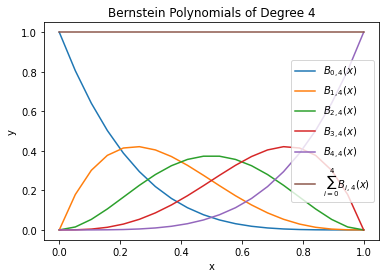

In [ ]:
#Bernstein Polynomials
import matplotlib.pyplot as plt
import numpy as np

# Recursive function for calculating Bernstien Polynomial
def BernPoly(i,n,t):
  if i == 0 and n == 0:
    return 1

  elif i < 0 or i > n:
    return 0
  
  else:
    return (1-t) * BernPoly(i,n-1,t) + t * BernPoly(i-1,n-1,t) # Reccurrence Relation


# Plotting Bernstein Polynomials of Degree 4
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bernstein Polynomials of Degree 4')
ax = plt.gca()
x = np.linspace(0,1,20)
ax.plot(x, BernPoly(0,4,x), label="$B_{0,4}(x)$") # i = 0
ax.plot(x, BernPoly(1,4,x), label="$B_{1,4}(x)$") # i = 1
ax.plot(x, BernPoly(2,4,x), label="$B_{2,4}(x)$") # i = 2
ax.plot(x, BernPoly(3,4,x), label="$B_{3,4}(x)$") # i = 3
ax.plot(x, BernPoly(4,4,x), label="$B_{4,4}(x)$") # i = 4
ax.plot(x, BernPoly(0,4,x) + BernPoly(1,4,x) + BernPoly(2,4,x) + BernPoly(3,4,x) + BernPoly(4,4,x), label="$\sum_{i=0}^4B_{i,4}(x)$") # sum of i's
ax.legend()

Note that the sum, of all Bernstein polynomials of degree $k$ with $i \leq k$ with equal $1$.

Note that if we want to find the *minimum* or *maximum* of a Bernstein Polynomial we will simply take the derivative of the polynomial and set it equal to zero, doing so will yield the following result:

\begin{equation*}
 B'_{i,n}(t) = \binom{n}{i}\left[nt^{k-1} (1-t)^{n-i} - t^i(n-i)(1-t)^{n-i-1}\right] = 0
\end{equation*}
\begin{equation*}
t = \frac{i}{n}
\end{equation*}

Thus the maximum or minimum of a Bernstein Polynomial will occur when $t = \frac{i}{n}$. We also note that $B'_{i,n}(t)$ can be written in the reccurrence relation,

\begin{equation*}
B'_{i,n}(t) = n \left[ B_{i-1,n-1}(t) - B_{i,n-1}(t) \right]
\end{equation*}

### Common Bernstein Polynomials to Know
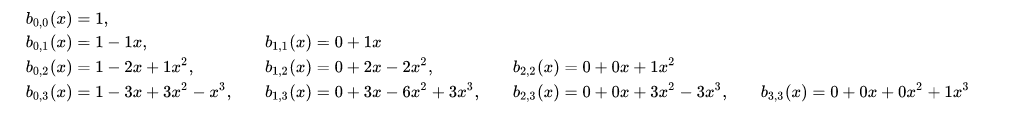

## 2. Drawing Bezier Curves using Linear Interpolation Directly

One way that we can draw *Bezier Curves* is by using what is known as "Linear Interpolation" or "lerping" for short between points in $\mathbb{R}^2$. So let's say we want to make a *Quadratic Bezier Curve* we will first start by picking four points say,
\begin{align*}
P_0 = (x_0, y_0) \\
P_1 = (x_1,y_1) \\
P_2 = (x_2, y_2) \\
P_3 = (x_3, y_3)
\end{align*}
We will start by connecting each $n_{th}$ point to the $n+1$ point by a line segment, with a point $L_k$ lying somewhere on the line denoted by a proportion of the distance between $P_n$ and $P_{n+1}$, denoted by $t$.
\begin{align*}
L_0(t) = P_0 + t(P_1 - P_0) \\
L_1(t) =  P_1 + t(P_2 - P_1) \\
L_2(t) =  P_2 + t(P_3 - P_2)
\end{align*}
Next we will connect the points $L_0$, $L_1$ and $L_2$ by a line segment, with a point $Q_k$ lying somewhere on the line denoted by a proportion of the distance between $L_n$ and $L_{n+1}$, denoted by $t$.
\begin{equation*}
Q_0(t) = L_0(t) + t(L_1(t) - L_0(t)) \\
Q_1(t) = L_1(t) + t(L_2(t) - L_1(t))
\end{equation*}
and lastly we will connect $Q_0$ and $Q_1$ by a line with a point $R(t)$, which will "draw" our curve,
\begin{equation*}
R(t) = Q_0(t) + t(Q_1(t) - Q_0(t))
\end{equation*}

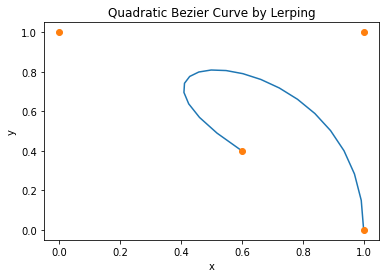

In [ ]:
# Drawing a Quadratic Bezier Curve using Linear Interpolation Directly

# Installs appropiate libraries
import matplotlib.pyplot as plt
import numpy as np

# gets four points for Bezier Curve
x0 = 1
y0 = 0
x1 = 1
y1 = 1
x2 = 0
y2 = 1
x3 = 0.6
y3 = 0.4


points = np.array([(x0,y0), (x1,y1), (x2,y2), (x3,y3)], dtype=float)


# Plots Quadratic Bezier
x = np.linspace(0,1, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Bezier Curve by Lerping')
ax = plt.gca()  
dataX = []
dataY = []

# Calculates R(t) for 0 <= t <= 1
for t in x:
  L0 = points[0] + t * (points[1] - points[0])
  L1 = points[1] + t * (points[2] - points[1])
  L2 = points[2] + t * (points[3] - points[2])
  Q0 = L0 + t*(L1 - L0)
  Q1 = L1 + t*(L2 - L1)
  R = Q0 + t * (Q1 - Q0)
  dataX.append(R[0])
  dataY.append(R[1])
ax.plot(dataX, dataY)

# Plots original anchor points
ax.plot([x0,x1,x2,x3], [y0,y1,y2,y3], 'o')


## 3. Drawing Bezier Curves using Bernstein Polynomials

We can achieve a similar result by first noticing that each "weighted sum" of points used in *linear interpolation* can be written in the form of a *Bernstein Polynomial* of some degree. Let's consider the case of the *Quadratic Bezier Curve* as above. first let's consider each interpolation:
\begin{align*}
&L_0(t) = P_0 + t(P_1 - P_0) \\
&L_1(t) =  P_1 + t(P_2 - P_1) \\
&L_2(t) =  P_2 + t(P_3 - P_2) \\
&Q_0(t) = L_0(t) + t(L_1(t) - L_0(t)) \\
&Q_1(t) = L_1(t) + t(L_2(t) - L_1(t)) \\
&R(t) = Q_0(t) + t(Q_1(t) - Q_0(t))
\end{align*}
Next we will expand $R(t)$,
\begin{align*}
R(t) = -P_0&t^3 + 3P_0t^2-3P_0t + P_0 &+\\
       3P_1&t^3-6P_1t^2+3P_1t &+\\
       -3P_2&t^3 + 3P_2t^2 &+\\
       P_3&t^3
\end{align*}
Now by factoring,
\begin{align*}
R(t) = &P_0(-t^3 + 3t^2-3t + 1)&+\\
       &P_1(3t^3-6t^2+3t)&+\\
       &P_2(-3t^3 + 3t^2) &+\\
       &P_3(t^3)
\end{align*}
Now we notice that each polynomial in the parantheses is a *Bernstein Polynomial of Degree 3* thus,
\begin{align*}
R(t) = &P_0B_{0,3}(t)&+\\
       &P_1B_{1,3}(t)&+\\
       &P_2B_{2,3}(t) &+\\
       &P_3B_{3,3}(t)
\end{align*}

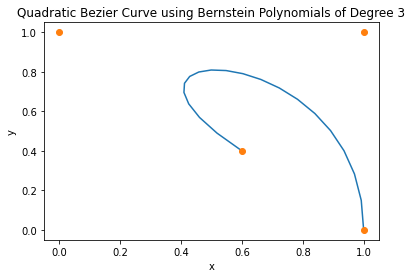

In [ ]:
# Drawing a Quadratic Bezier Curve using Bernstein Polynomials

# Installs appropiate libraries
import matplotlib.pyplot as plt
import numpy as np

# x and y coordinates of 4 points
x0 = 1
y0 = 0
x1 = 1
y1 = 1
x2 = 0
y2 = 1
x3 = 0.6
y3 = 0.4

points = np.array([(x0,y0), (x1,y1), (x2,y2), (x3,y3)], dtype=float)

# plots R(t)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Bezier Curve using Bernstein Polynomials of Degree 3')
ax = plt.gca()
x = np.linspace(0,1,20)


ax.plot(x0*BernPoly(0,3,x) + x1*BernPoly(1,3,x) + x2*BernPoly(2,3,x) + x3*BernPoly(3,3,x),
        y0*BernPoly(0,3,x) + y1*BernPoly(1,3,x) + y2*BernPoly(2,3,x) + y3*BernPoly(3,3,x)) 

# Plots original anchor points
ax.plot([x0,x1,x2,x3], [y0,y1,y2,y3], 'o')

In general will use the *Bernstein Polynomial* of $k-1$ where $k$ is the number of points.